# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). 

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

**In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.**


# Explore Datasets

**We have 2 datasets that we can compare. One contains movies from before Hickey's analysis and the second set contains movies from after the analysis.**

In [1]:
import pandas as pd

# Read Datasets into DataFrames
original_movies = pd.read_csv("fandango_score_comparison.csv")
recent_movies = pd.read_csv("movie_ratings_16_17.csv")

# Show first 5 rows
original_movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
# Show first 5 rows
recent_movies.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Our datasets contain a row for each movie and then columns for ratings from different websites. We only care about the Fandago ratings so lets filter out those columns and create 2 new datasets.

In [3]:
# Filter original movie dataset
original_movies['Year'] = original_movies['FILM'].str.extract(r"\((\d+)\)")
original_movies['FILM'] = original_movies['FILM'].str.replace("\(\d+\)", "").str.replace('(', '').str.replace(')', '')
original_movies['Year'] = original_movies['Year'].astype(int)
updated_originals = original_movies[['FILM', 'Year', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
updated_originals.head(5)

,FILM,Year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5
1,Cinderella,2015,5.0,4.5,12640,0.5
2,Ant-Man,2015,5.0,4.5,12055,0.5
3,Do You Believe?,2015,5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2,2015,3.5,3.0,1021,0.5


In [4]:
# Filter recent movies dataset
updated_recents = recent_movies[['movie', 'year', 'fandango']]
updated_recents.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Now, after reading the Readme for the orginal dataset found here- https://github.com/fivethirtyeight/data/blob/master/fandango/README.md 
We have a problem. Our initial goal was to compare the ratings from before and after Hickey's article. The original dataset took a sample of only popular movies defined as being any movie with over 30 ratings. This is shown below:

In [5]:
# Check number of ratings
updated_originals['Fandango_votes'].value_counts().sort_index(ascending=True)

35       1
36       1
38       2
41       2
42       1
        ..
15749    1
33538    1
34085    1
34390    1
34846    1
Name: Fandango_votes, Length: 140, dtype: int64

Therefore, we cannot compare all movies and our project must be adjusted to **Compare the ratings of popular movies on Fandango from before and after Hickey's article.** This leads to the next problem which is that the second dataset does not contain data about the number of fandango ratings. To check that the movies in this dataset are popular I am going to take a sample of 10 of the movies and check to make sure that they have more than 30 ratings on Fandango. If at least 9 of the 10 have more than 30 ratings then we can move on with the new project aim.

In [6]:
from random import sample

# Generate sample of 10 movies
ten_movies = sample(list(updated_recents['movie']), 10)
ten_movies

['Dirty Grandpa',
 'The Disappointments Room',
 'Batman V Superman: Dawn of Justice',
 'Storks',
 'Ghostbusters',
 'La La Land',
 'Lights Out',
 'Money Monster',
 '10 Cloverfield Lane',
 'Suicide Squad']

Each of the 10 movies above have above 30 ratings. We can proceed. Firstly, we can compare the frequencies of each rating. Scores are given from 1-5 stars so let's see which are the most common ratings. For simplicaties sake lets compare movie ratings from 2015 (pre article) to 2016 (post article). 

In [7]:
# Filter data into 2015 and 2016 
movies_2015 = updated_originals[updated_originals["Year"] == 2015]
movies_2016 = updated_recents[updated_recents["year"] == 2016]

Text(0.5, 1.0, 'Fandago Ratings 2015 v 2016')

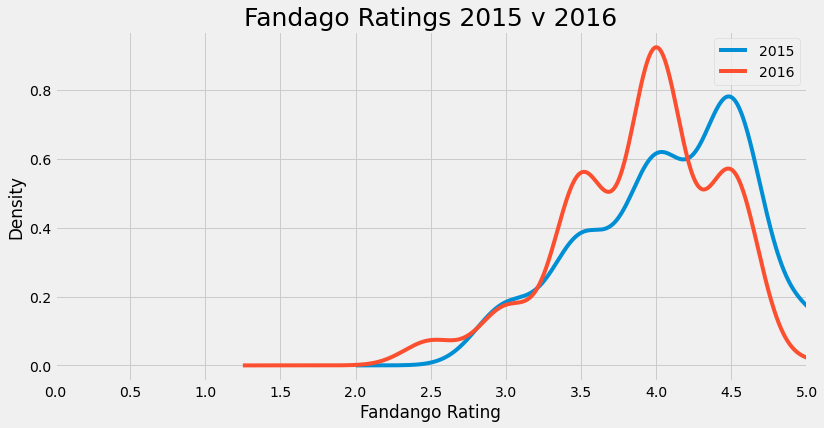

In [8]:
import matplotlib.pyplot as plt

# Plot KDE chart
plt.style.use("fivethirtyeight")
movies_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(12, 6))
movies_2016['fandango'].plot.kde(label='2016', legend=True)

plt.xlim(0,5)
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xlabel("Fandango Rating")
plt.title("Fandago Ratings 2015 v 2016", fontsize=25)

Well, this is interesting. Both show a significant shift to the higher ratings on the right but notice that there were a higher proportion of 4.5 and 5 star ratings in the 2015 data compared to 2016 which has a higher proportion of 4 and 3.5 star ratings. We can confirm the results of this chart by taking a look at the percentages for each rating in 2015 and 2016 in the chart below:

In [9]:
# Create dataframe with 2015 and 2016 normalized value counts for movie ratings
frequencies = pd.DataFrame([movies_2015['Fandango_Stars'].value_counts(normalize=True), movies_2016['fandango'].value_counts(normalize=True)])
frequencies = frequencies.transpose()
frequencies.columns = ["2015 (%)", "2016 (%)"]
frequencies['2015 (%)'] = frequencies['2015 (%)'] * 100
frequencies['2016 (%)']  = frequencies['2016 (%)'] * 100

frequencies.fillna(0, inplace=True)
frequencies['2015 (%)'] = round(frequencies['2015 (%)'], 2)
frequencies['2016 (%)'] = round(frequencies['2016 (%)'], 2)
frequencies

,2015 (%),2016 (%)
2.5,0.00,3.14
3.0,8.53,7.33
3.5,17.83,24.08
4.0,28.68,40.31
4.5,37.98,24.61
5.0,6.98,0.52


Like we saw in the KDE chart 2015 saw a higher proportion of 4.5 and 5 star ratings than 2016 which itself saw a higher proportion of 4 and 3.5 star ratings. Let's finish by taking a look at the mean, mode and median for ratings in 2015 and 2016.

(2.0, 5.0)

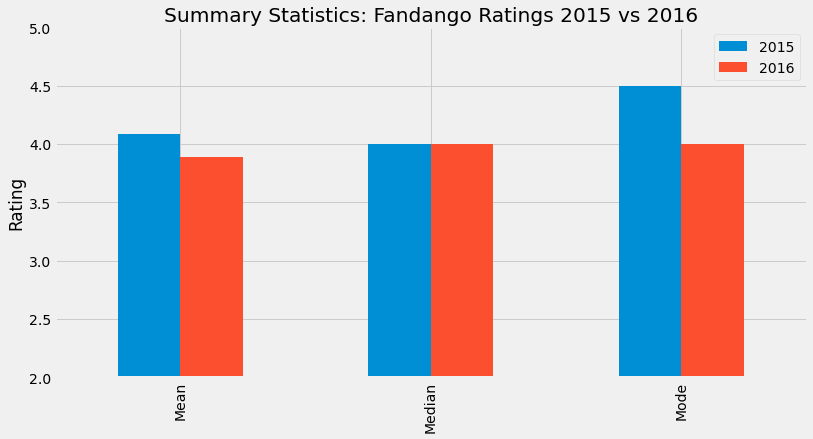

In [10]:
# Calculate 2015 statistics
mean_2015 = movies_2015['Fandango_Stars'].mean()
median_2015 = movies_2015['Fandango_Stars'].median()
mode_2015 = movies_2015['Fandango_Stars'].mode()
mode_2015 = float(mode_2015[0])

# Calculat2 2016 statisitcs 
mean_2016 = movies_2016['fandango'].mean()
median_2016 = movies_2016['fandango'].median()
mode_2016 = movies_2016['fandango'].mode()
mode_2016 = float(mode_2016[0])

# Create Dataframe
stats_list = [
    {"2015": mean_2015, "2016": mean_2016},
    {"2015": median_2015, "2016": median_2016},
    {"2015": mode_2015, "2016": mode_2016}]

stats_df = pd.DataFrame(stats_list)
stats_df.index = ['Mean', 'Median', "Mode"]

# Plot bar chart 
plot = stats_df.plot.bar(y=["2015", "2016"], figsize=(12, 6))
plot.set_title("Summary Statistics: Fandango Ratings 2015 vs 2016")
plot.set_ylabel("Rating")
plot.set_ylim(2,5)

# Final Thoughts

The median for both 2015 and 2016 was 4. Meanwhile, the mode for 2015 was 4.5 stars compared to 4 in 2016 and the mean rating dropped from above 4 to 3.9. This reflects what we saw with the frequencies earlier. There has been a definite shift from 2015 to 2016 in the number of popular movies scoring 4.5 or 5 stars. More of these popular movies are now scoring 3.5 or 4 stars. 

We do not know if this shift was becuase of Hickey's analysis but one thing I would say is that if you are a movie maker don't feel bad if your movies are now scoring lower on Fandango than they did in 2015! 